## Importation des librairies

In [13]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### Question 1

In [14]:
data = pd.read_csv('villes.csv', sep=';')
X=data.iloc[:,1:13].values
labels=data.iloc[:,0].values

In [15]:
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

pca=PCA(2)
X_pca = pca.fit_transform(X_norm)

In [16]:
kmeans = KMeans(3)
clustering=kmeans.fit_predict(X)

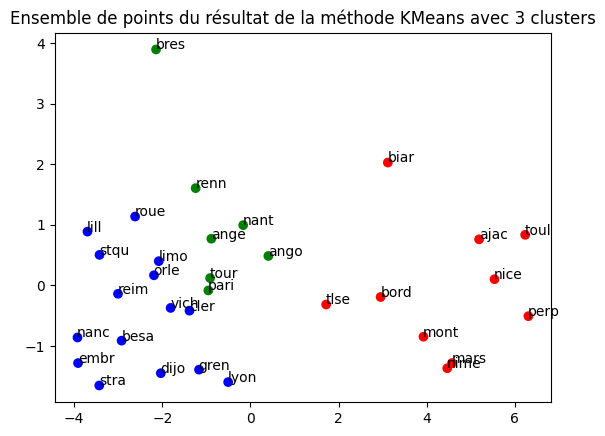

In [17]:
colors = ['red', 'green', 'blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(data.iloc[:,0].values, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
plt.title('Ensemble de points du résultat de la méthode KMeans avec 3 clusters')
plt.show()

### Question 2

Silhouette score pour la méthode ward : 0.3815373989810239


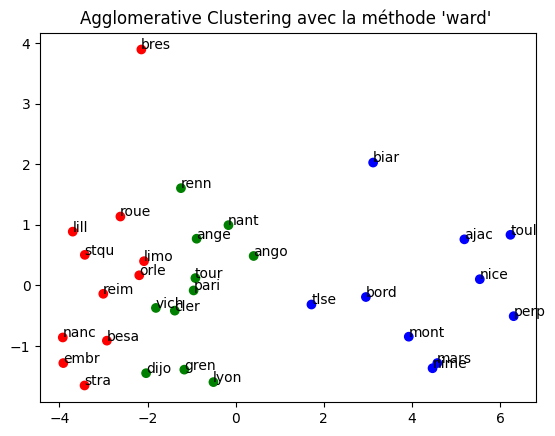

Silhouette score pour la méthode average : 0.5067547529956749


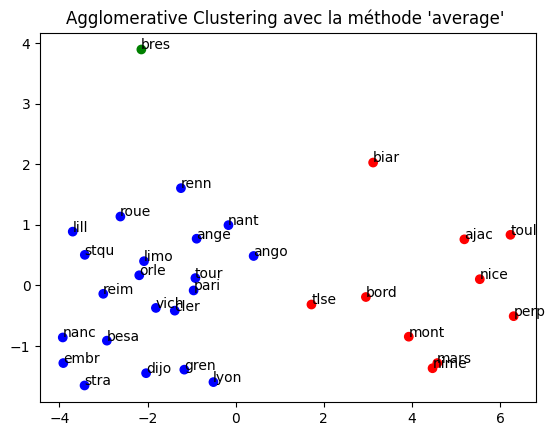

Silhouette score pour la méthode single : -0.03165325510003537


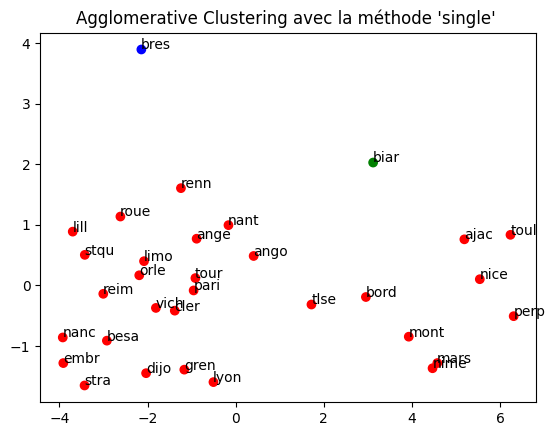

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

methods = ['ward', 'average', 'single']

for method in methods:
    clustering = AgglomerativeClustering(n_clusters=3, linkage=method).fit(X_pca)
    silhouette_avg = silhouette_score(X_pca, clustering.labels_)
    print(f"Silhouette score pour la méthode {method} : {silhouette_avg}")

    colors = ['red', 'blue', 'green']
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clustering.labels_, cmap=matplotlib.colors.ListedColormap(colors))
    for label, x, y in zip(data.iloc[:,0].values, X_pca[:, 0], X_pca[:, 1]):
        plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.title(f"Agglomerative Clustering avec la méthode '{method}' ")
    plt.show()


### Question 3

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


best_score = -1
best_k = -1

for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    if score > best_score:
        best_score = score
        best_k = k
        
print("Meilleure partition pour KMeans : nombre de clusters =", best_k, ", score de silhouette =", best_score)


Meilleure partition pour KMeans : nombre de clusters = 2 , score de silhouette = 0.6181156437258195


### Question 4

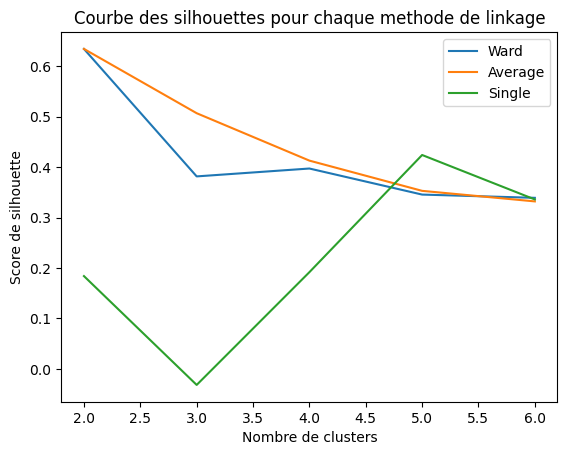

Nombre optimal de clusters pour la méthode de linkage 'ward': 2
Nombre optimal de clusters pour la méthode de linkage 'average': 2
Nombre optimal de clusters pour la méthode de linkage 'single': 5


In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

# Initialiser les listes pour stocker les scores de silhouette pour chaque méthode de linkage
silhouette_scores_ward = []
silhouette_scores_average = []
silhouette_scores_single = []

# Boucler sur le nombre de clusters
for n_clusters in range(2, 7):
    
    # Appliquer AgglomerativeClustering avec la méthode de linkage "ward"
    ac_ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
    ac_ward.fit(X_pca)
    ward_silhouette_score = silhouette_score(X_pca, ac_ward.labels_)
    silhouette_scores_ward.append(ward_silhouette_score)
    
    # Appliquer AgglomerativeClustering avec la méthode de linkage "average"
    ac_average = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
    ac_average.fit(X_pca)
    average_silhouette_score = silhouette_score(X_pca, ac_average.labels_)
    silhouette_scores_average.append(average_silhouette_score)
    
    # Appliquer AgglomerativeClustering avec la méthode de linkage "single"
    ac_single = AgglomerativeClustering(n_clusters=n_clusters, linkage='single')
    ac_single.fit(X_pca)
    single_silhouette_score = silhouette_score(X_pca, ac_single.labels_)
    silhouette_scores_single.append(single_silhouette_score)

# Tracer la courbe de silhouette
plt.plot(range(2, 7), silhouette_scores_ward, label='Ward')
plt.plot(range(2, 7), silhouette_scores_average, label='Average')
plt.plot(range(2, 7), silhouette_scores_single, label='Single')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.legend()
plt.title("Courbe des silhouettes pour chaque methode de linkage")
plt.show()

# Trouver le nombre optimal de clusters pour chaque méthode de linkage
optimal_clusters_ward = silhouette_scores_ward.index(max(silhouette_scores_ward)) + 2
optimal_clusters_average = silhouette_scores_average.index(max(silhouette_scores_average)) + 2
optimal_clusters_single = silhouette_scores_single.index(max(silhouette_scores_single)) + 2

print(f"Nombre optimal de clusters pour la méthode de linkage 'ward': {optimal_clusters_ward}")
print(f"Nombre optimal de clusters pour la méthode de linkage 'average': {optimal_clusters_average}")
print(f"Nombre optimal de clusters pour la méthode de linkage 'single': {optimal_clusters_single}")


### Question 5

La méthode avec le score de silhouette le plus élevé fournit la meilleure partition. Donc en considérant 3 clusters et d'après le graphe ci dessus, c'est la methode "average" qui donne la meilleure partition.

### Question 6

Agglomeration Clustering
Avantages :
- Ne nécessite pas de spécifier à l'avance le nombre de clusters.
- Offre une visualisation sous forme de dendrogramme permettant d'observer la structure hiérarchique des clusters.
- Les clusters créés peuvent être facilement interprétés et associés à des groupes logiques.

Inconvénients :
- Les résultats peuvent varier considérablement en fonction des choix de mesure de distance et de méthode d'agrégation, rendant difficile la détermination du meilleur choix.
- Peut produire des clusters de tailles très différentes, ce qui peut poser des problèmes lors de l'analyse des résultats.

Kmeans
Avantages :
- Très efficace lorsque les clusters sont bien séparés dans les données.
- Les résultats de KMeans sont facilement interprétables.

Inconvénients :
- Le nombre de clusters doit être spécifié à l'avance, ce qui peut être difficile à déterminer pour des ensembles de données plus complexes.
- Ne fonctionne pas bien lorsque les clusters ont des tailles différentes ou des formes irrégulières.

### Question 7

In [9]:
def clustering_hybride(X, n_clusters, linkage="ward"):
    # Initialiser les clusters avec KMeans
    kmeans = KMeans(n_clusters=n_clusters)
    initialisation = kmeans.fit_predict(X)

    # Affiner les clusters avec AgglomerativeClustering
    agglomeratif = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
    groupes = agglomeratif.fit_predict(X, initialisation)
    
    return groupes


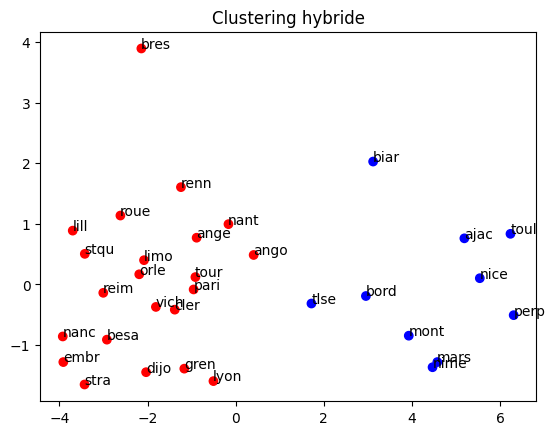

In [10]:
# Appliquer la méthode hybride
groupes_hybrides = clustering_hybride(X_norm, n_clusters=2)

# Visualiser les résultats
colors = ['red', 'yellow', 'blue']
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=groupes_hybrides, cmap=matplotlib.colors.ListedColormap(colors))
for label, x, y in zip(data.iloc[:,0].values, X_pca[:, 0], X_pca[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(-0.2, 0.2), textcoords='offset points')
    plt.title('Clustering hybride')
plt.show()

### Question 8

Appliquons cette procédure sur le jeu de données de spamb.csv:

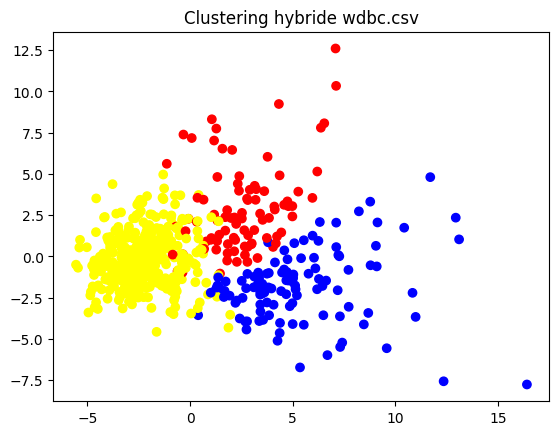

In [11]:
data_wdbc = pd.read_csv('./wdbc.csv', sep=';')
wdbc=data_wdbc.values

scaler = StandardScaler()
wdbc_norm = scaler.fit_transform(wdbc)

pca=PCA(2)
wdbc_pca = pca.fit_transform(wdbc_norm)

groupes_hybrides = clustering_hybride(wdbc_norm, n_clusters=3)

colors = ['red', 'yellow', 'blue']
plt.scatter(wdbc_pca[:, 0], wdbc_pca[:, 1], c=groupes_hybrides, cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Clustering hybride wdbc.csv')
plt.show()

Appliquons cette procédure sur le jeu de données de spamb.csv:

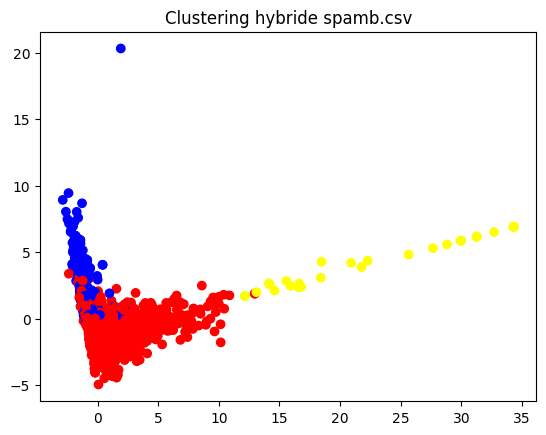

In [12]:
data_spamb = pd.read_csv('./spamb.csv', sep=';')
spamb=data_spamb.values

scaler = StandardScaler()
spamb_norm = scaler.fit_transform(spamb)

pca=PCA(2)
spamb_pca = pca.fit_transform(spamb_norm)

groupes_hybrides = clustering_hybride(spamb_norm, n_clusters=3)

colors = ['red', 'yellow', 'blue']
plt.scatter(spamb_pca[:, 0], spamb_pca[:, 1], c=groupes_hybrides, cmap=matplotlib.colors.ListedColormap(colors))
plt.title('Clustering hybride spamb.csv')
plt.show()